## An analysis of Rick and Morty episode rankings
![title](rickandmorty.jpg)
Rick and Morty is an animated television show created by Justin Roiland and Dan Harmon for Adult Swim. All data and images are used without claim of ownership and belong to their respective owners.


Rankings from 18 websites were collected into a single data frame. 
Some rankings do not include all 31 episodes; that is, some are "Top 10 Episodes" rankings. 
In other cases, some are not rankings, but just summaries of a finite selection of episodes and/or selections of episodes across only one or two of the three seasons.

### TL;DR
* Overall, episode rankings varied greatly.
* Top three highest ranked episodes, on average, are listed below; all three just happen to be my three favorite episodes:
    1. **"Total Rickall" (Season 2, Episode 4)** 
    2. **"The Ricklantis Mixup" (Season 3, Episode 7)** 
    3. **"Meeseeks and Destroy" (Season 1, Episode 5)**
    * Only one of these episodes features a traditional Rick + Morty adventure as the "A story"
* Lowest three:
    31. **"Raising Gazorpazorp" (Season 1, Episode 7)**
    30. **"The Rickchurian Mortydate" (Season 3, Episode 10)**
    29. **"Interdimensional Cable 2: Tempting Fate" (Season 2, Episode 8)** This was a non-traditional episode, considered an unsatisfying sequel to the mostly improvised Season 1's *"Rixty Minutes"*
* Many episodes had highly divergent rankings, of note:
    * **"Vindicators 3: The Return of Worldender" (Season 3, Episode 4)**
    * **"Something Ricked This Way Comes" (Season 1, Episode 9)**
    * **"M. Night Shaym-Aliens!" (Season 1, Episode 4)**
* The rankings do not reveal that any particular season is more liked than others.
* Also, none of the season premieres or finales were in the top five, though the Season 2 finale *"Wedding Squanchers"* rounds out the average top 10.
* The last episode that aired - The Rickchurian Mortydate (Season 3, Episode 10) - left much to be desired. It is consistently ranked in the bottom third of all episodes across many lists.

### What I'd like to explore...
* Can I quantify what makes a *great* Rick and Morty episode?
    * Use Kaggle Rick and Morty data on episode metadata
    * Perform sentiment analysis of text explaining rankings from source articles
* Are there certain characters whose inclusion (or omission) in an episode makes it better than others?
    * Traditional Rick + Morty adventure episodes, with a B-story featuring other family members
    * Episodes that effectively develop lots of characters at once (a la *Total Rickall*)
* Tie in data with other rating/ranking scales (e.g., IMDB scores)
* Apply this same approach to other tv show episode rankings or artists' song rankings


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("rickandmorty.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 19 columns):
Season             31 non-null int64
Episode            31 non-null int64
Title              31 non-null object
IndieWire          31 non-null int64
Collider           31 non-null int64
Thrillist          31 non-null int64
IMDb               31 non-null int64
Inverse            31 non-null int64
Uproxx_13          13 non-null float64
IGN_10             10 non-null float64
Metro_US           31 non-null int64
Ranker             29 non-null float64
AcclaimMagazine    23 non-null float64
Cinemaholic_10     10 non-null float64
Joe_IE_3and3       6 non-null float64
TheTopTens_10      31 non-null int64
Reddit             31 non-null int64
Reddit_Heatmap     31 non-null int64
Rank_With_Ties     31 non-null int64
dtypes: float64(6), int64(12), object(1)
memory usage: 4.7+ KB


In [3]:
df["AvgRank"] = df.loc[:,"IndieWire":"Reddit_Heatmap"].mean(axis=1).round()
df["RankWithTies"] = df['AvgRank'].rank()
df["Divergence"] = df["AvgRank"] * (df.loc[:,"IndieWire":"Reddit_Heatmap"].max(axis=1) - df.loc[:,"IndieWire":"Reddit_Heatmap"].min(axis=1))
df[["AvgRank","RankWithTies","Divergence"]]

,AvgRank,RankWithTies,Divergence
0,23.0,27.5,414.0
1,12.0,12.5,288.0
2,19.0,20.0,399.0
3,16.0,16.0,432.0
4,6.0,3.0,60.0
5,9.0,6.5,180.0
6,27.0,31.0,378.0
7,9.0,6.5,216.0
8,22.0,25.0,462.0
9,10.0,9.5,280.0


Text(0,0.5,'Episode Title')

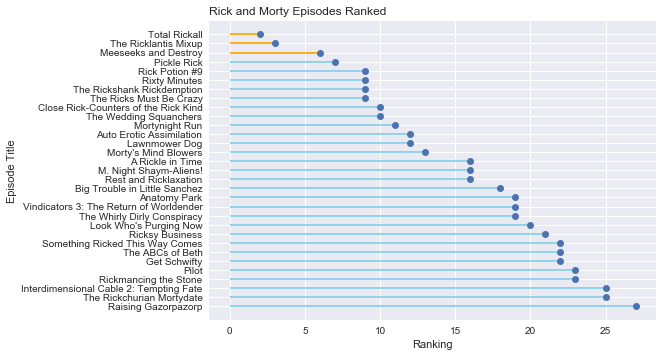

In [4]:
# Re-order dataframe by Average Rank:
ordered_df = df.sort_values(by='AvgRank',ascending=False)
my_range=range(1,len(df.index)+1)
 
# Use the hline function to make plot
import seaborn as sns
my_color=np.where(ordered_df['AvgRank']<7, 'orange', 'skyblue')
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['AvgRank'], color=my_color)
plt.plot(ordered_df['AvgRank'], my_range, "o")
 
# Add titles and axis names
plt.yticks(my_range, ordered_df['Title'])
plt.title("Rick and Morty Episodes Ranked", loc='left')
plt.xlabel('Ranking')
plt.ylabel('Episode Title')
 

Text(0,0.5,'Episode Title')

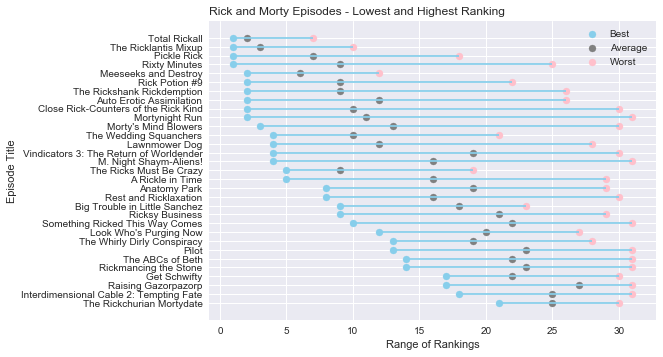

In [5]:
# Calculate max Rank for each episode:
df['MaxRank'] = df.loc[:,"IndieWire":"Reddit_Heatmap"].min(axis=1)
df['WorstRank'] = df.loc[:,"IndieWire":"Reddit_Heatmap"].max(axis=1)
ordered_df = df.sort_values(by=['MaxRank','WorstRank'],ascending=False)
my_range=range(1,len(df.index)+1)
 
# Use the hline function to make plot
import seaborn as sns
my_color='skyblue'
plt.hlines(y=my_range, xmin=ordered_df["MaxRank"], xmax=ordered_df["WorstRank"],color=my_color)
plt.scatter(ordered_df["MaxRank"], my_range, color='skyblue', alpha=1, label='Best')
plt.scatter(ordered_df["AvgRank"], my_range, color="gray", alpha=1, label="Average")
plt.scatter(ordered_df["WorstRank"], my_range, color='pink', alpha=1 , label='Worst')
plt.legend()
#plt.plot(ordered_df.MaxRank, my_range, "o")
 
# Add titles and axis names
plt.yticks(my_range, ordered_df['Title'])
plt.title("Rick and Morty Episodes - Lowest and Highest Ranking", loc='left')
plt.xlabel('Range of Rankings')
plt.ylabel('Episode Title')
 

* **Consistently ranked high:**
    * *Total Rickall*
    * *The Ricklantis Mixup*
    * *Meeseeks and Destroy* 
    * **These are the overall top three episodes**
* **Consistently ranked low:**
    * *The Rickchurian Mortydate*
    * *Interdimensional Cable 2: Tempting Fate*
    * *Raising Gazorpazorp*
    * *Get Schwifty*
* **Particularly polarizing episodes**
    * *Close Rick-Counters of the Rick Kind*
    * *Mortynight Run*

In [6]:
df[['Title','Divergence']].sort_values(by='Divergence', ascending=False)

,Title,Divergence
24,Vindicators 3: The Return of Worldender,494.0
8,Something Ricked This Way Comes,462.0
3,M. Night Shaym-Aliens!,432.0
10,Ricksy Business,420.0
0,Pilot,414.0
2,Anatomy Park,399.0
22,Rickmancing the Stone,391.0
11,A Rickle in Time,384.0
6,Raising Gazorpazorp,378.0
29,The ABCs of Beth,374.0


## Alternate divergence metric
1. Divide rankings into quartiles/quintiles
2. Assign individual rankings into ranking quartile/quintile
3. Plot bins of rankings by quintile
4. Those episodes with dots in various bins are controversial, as opposed to those where dots are clustered (consistently ranked in the same general place)

In [7]:
### IMDB data 
rm_imdb = pd.read_csv("RickandMorty_IMDB.csv")
rm_imdb.info()
rm_imdb.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
Season           31 non-null int64
Episode          31 non-null int64
Title            31 non-null object
IMDbScore        31 non-null float64
IMDbNumRaters    31 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.3+ KB


,Season,Episode,Title,IMDbScore,IMDbNumRaters
0,1,1,Pilot,8.0,7409
1,1,2,Lawnmower Dog,8.5,7475
2,1,3,Anatomy Park,8.3,6766
3,1,4,M. Night Shaym-Aliens!,8.5,6870
4,1,5,Meeseeks and Destroy,8.7,7775


Text(0,0.5,'Episode Title')

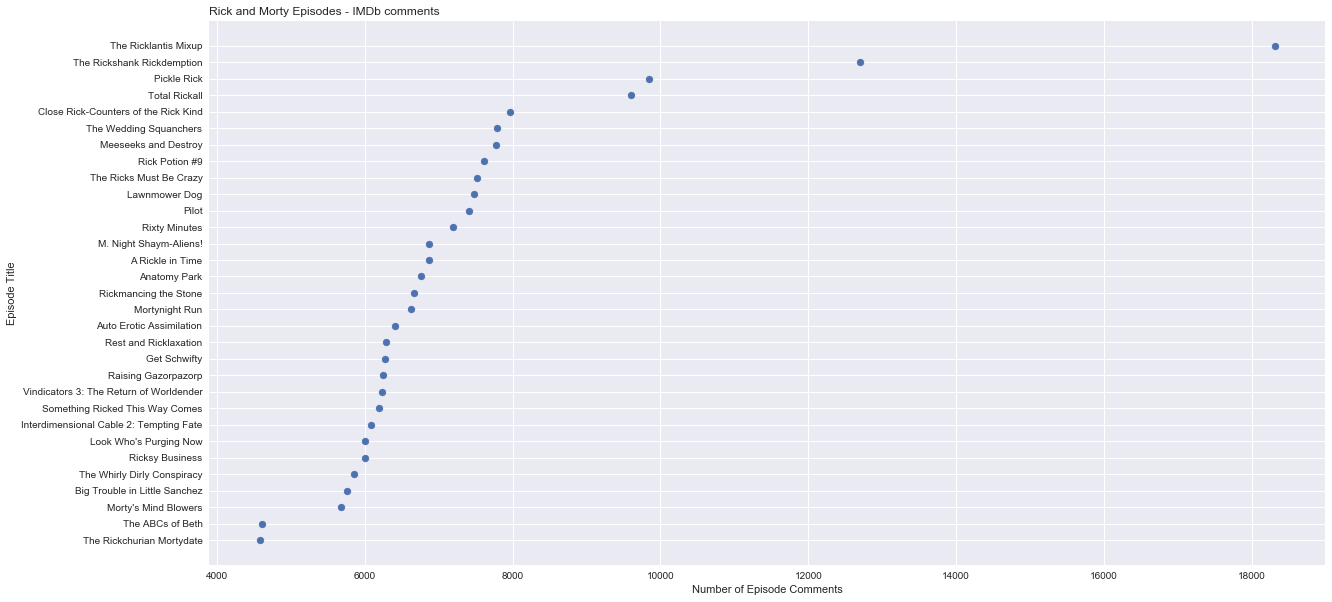

In [16]:
plt.figure(figsize=(20,10))
ordered_df = rm_imdb.sort_values(by=['IMDbNumRaters'],ascending=True)


plt.scatter(ordered_df["IMDbNumRaters"],ordered_df["Title"])
# Add titles and axis names

plt.title("Rick and Morty Episodes - IMDb comments", loc='left')
plt.xlabel('Number of Episode Comments')
plt.ylabel('Episode Title')

* Four episodes with the most comments on IMDb.com
    * *The Ricklantis Mixup*
            * This is considered one of the show's top 3 episodes, on average
            * It was a traditional Rick and Morty adventure episode with a few twists:
                * No B-story plot, did not feature Beth, Jerry, or Summer
                * Only featured variations of Rick and Morty characters, but did so brilliantly
    * *The Rickshank Redemption*
            * This was the long-anticipated surprise premiere episode of Season 3
    * *Pickle Rick*
            * This episode won an Emmy award for Outstanding Animated Program
    * *Total Rickall*
            * On average, this is the favorite *Rick and Morty* episode
* The two episodes with the fewest comments are the two most recent episodes
    * Perhaps there has not been as much time allowed for as many comments as other episodes
    * These also happen to be consistently lower ranked episodes in many lists

## Resources
Metadata on episodes from Kaggle https://www.kaggle.com/igorbettio/rick-and-morty-data/home
IMDb episode reviews and ratings https://www.imdb.com/title/tt2861424/

### Rankings
* Collider: http://collider.com/rick-and-morty-episodes-ranked/
* IndieWire: https://www.indiewire.com/2017/08/best-rick-and-morty-episode-ranked-1201859992/
* Thrillist: https://www.thrillist.com/entertainment/nation/best-rick-and-morty-episodes-ranked
* IGN: https://www.ign.com/articles/2018/07/03/the-top-10-rick-and-morty-episodes
* Inverse: https://www.inverse.com/article/36213-best-rick-and-morty-episodes-ever-ranking-seasons
* Uproxx: https://uproxx.com/tv/best-rick-and-morty-episodes-ranked/
* IMDb: https://www.imdb.com/list/ls020968306/
* Metro US: https://www.metro.us/entertainment/tv/ranking-every-rick-and-morty-episode-31-1
* JOE: https://www.joe.ie/movies-tv/ranking-best-3-worst-3-episodes-rick-morty-603202
* Acclaim Magazine: https://acclaimmag.com/culture/we-ranked-every-episode-of-rick-morty/
* Paste Magazine:https://www.pastemagazine.com/articles/2017/10/rick-and-morty-season-three-episode-ranking.html
* The Fader: http://www.thefader.com/2017/07/25/rick-and-morty-dan-harmon-justin-roiland-season-3
* The Cinemaholic: https://www.thecinemaholic.com/best-rick-and-morty-episodes/
* The Top Tens: https://www.thetoptens.com/rick-morty-episodes/
* Flickering Myth: https://www.flickeringmyth.com/2017/10/rick-and-morty-season-3-every-episode-ranked-from-worst-to-best/
* Ranker: https://www.ranker.com/list/best-rick-and-morty-episodes/reference
* Reddit: https://www.reddit.com/r/rickandmorty/comments/74fol0/definitive_ranking_of_all_31_rick_and_morty/

